# Elementary Gradient Descent



During training, many machine-learning models must minimise the objective function $J(\theta)$ with the parameters $\theta$ during model training. Most often, $J(\theta)$ consists of a general loss function $\mathcal{L}(\theta)$ and numerous regularisation terms which act as additional constraints. The aim is to find a set of parameters $\theta^{*}$ such that $J(\theta)$ is minimised $\theta^{*} = \text{argmin}_{\theta}[J(\theta)]$. In most cases, there is no analytic solution for $\theta^{*}$. Therefore, numerical methods are employed. These methods are algorithms known as optimisiers in the context of machine learning. The most simple and fundamental is known as _gradient descent_. Let us write down puesdocode for the elementary gradient descent algorithm ([Lecture Notes – MIT 6.390 Spring 2024](https://introml.mit.edu/_static/spring24/LectureNotes/6_390_lecture_notes_spring24.pdf)),

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Gradient Descent}(\boldsymbol{\theta}_{\text{init}}, \eta,  N) \\
1. & \boldsymbol{\theta}_{(0)} \gets \boldsymbol{\theta}_{\text{init}} \\
2. & t \gets 0 \\
3. & \textbf{repeat} \\
4. & \quad t \gets t + 1 \\
5. & \quad \boldsymbol{\theta}_{(t)} \gets \boldsymbol{\theta}_{(t-1)} - \eta \, \nabla_{\theta} J(\boldsymbol{\theta}_{(t-1)}) \\
6. & \textbf{until} \ t=N \\
7. & \textbf{return} \ \boldsymbol{\theta}_{(t)} \\
\end{array}
$$


During the initial time $t=0$, starting values for the trainable model parameters are selected $\theta_{init}$. These initial parameters are either random or computed by an initialisation scheme dependent on the model. At its core, gradient descent is an iterative process where the $N$ is the number of iterations or epochs. $\eta$ is a constant and is known as the **learning rate** which scales the **gradient** (with respect to the model parameters) $\nabla_{\theta} J$. Typically, $\eta$ is small and in the range of $10^{-2}$ to $10^{-5}$. It is clear that the elementary gradient descent algorithm terminates by returning, 


$$\theta_{N} = \theta_{(0)} - \eta \left( \nabla_{\theta}J(\theta_{(0)}) + \nabla_{\theta}J(\theta_{(1)}) + \nabla_{\theta}J(\theta_{(2)}) + ... + \nabla_{\theta}J(\theta_{(N-1)}) \right)$$

Or in more compact and clear notation,

$$\theta_{N} = \theta_{(0)} - \eta \sum_{j = 0}^{N-1} G_{j}$$

In which, the gradient evaluated for the model parameters $\theta_{(j)}$ is denoted as $G_{j}$. Let us now consider a linear regression model where $y_i = mx + b$  with the objective function $J(\theta, \hat{y_i}) = \frac{1}{N} \sum^{N}_{i=1} (y_i - \hat{y_i})^2$ such that the training parameters are $\theta = (m, b)$. It is straight-forward to find an analytic form for the gradient $\nabla_{\theta} J = (\partial / \partial m, / \partial J / \partial b)$,

$$
\frac{\partial J}{\partial m} =  -\frac{2}{N} \sum_{i=1}^{N} x_i (y_i - \hat{y_i}) 
\qquad 
\frac{\partial J}{\partial b} =  -\frac{2}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})
$$

We implement elementary gradient descent for a linear regression model below.

In [31]:
# Imports,
import numpy as np

def grad_descent(data, init_m, init_b, lr, epochs):
    """Elementary gradient descent algorithm for a linear regression model."""

    # Initialising lists,
    m_params = []
    b_params = []
    loss_vals = []

    # Unpacking data,
    x, y = data[0], data[1]
    N = len(data[0])

    # Initialising model parameters,
    m, b = init_m, init_b

    # Applying gradient descent,
    for i in range(epochs):
    
        # Computing model predictions,
        y_pred = m*x + b

        # Computing gradients,
        grad_m = (-2/N)*np.sum(x*(y-y_pred))
        grad_b = (-2/N)*np.sum(y-y_pred)

        # Updating parameters,
        m = m - lr*grad_m
        b = b - lr*grad_b

        # Storing parameters for each epoch,
        m_params.append(m)
        b_params.append(b)

        # Storing loss for each epoch,
        loss_vals.append(np.mean((y - y_pred)**2))

    return m_params, b_params, loss_vals

Now demonstate we demonstrate fitting a linear model against linear data with gaussian (random) noise using this elementary graduent descent algorithm. We consider gradient descent starting from two sets of initial parameters shown in blue and green respectively. Regardless of the intial conditions, the algorithm returns model parameters that converge to their optimal values i

Optimal parameters: m = 1.0344831683416404, b = 0.5679678648065636


C:\Users\Prithvi\AppData\Local\Temp\ipykernel_4952\3185023175.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


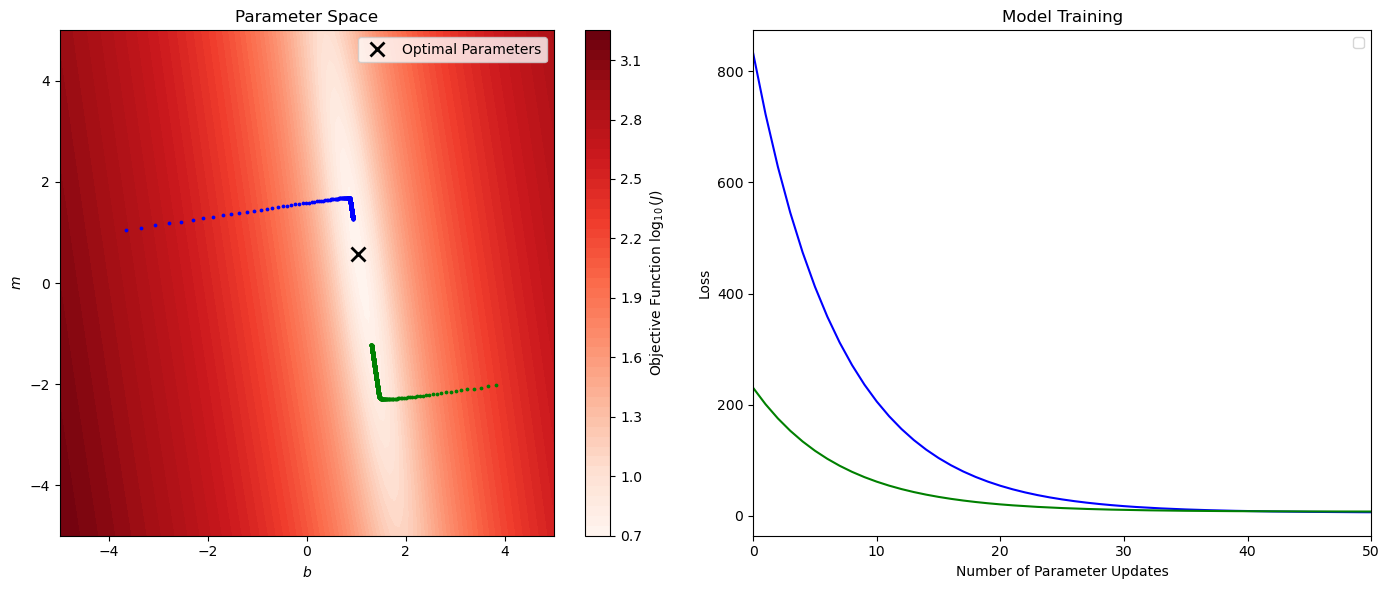

In [87]:
# Imports,
import matplotlib.pyplot as plt

"""CREATING MODEL DATA"""

# Random seed,
np.random.seed(42)

# Parameters,
m = 1
b = 1
N = 100
noise_std = 2.5

# Creating data,
x = np.linspace(0, 10, N)
noise = np.random.normal(0, noise_std, size=N)
y = m*x + b + noise
data = np.array([x, y])

"""PERFORMING GRADIENT DESCENT"""
m1_params, b1_params, loss_vals1 = grad_descent(data=data, init_m=-4, init_b=1, lr=0.001, epochs=1000)
m2_params, b2_params, loss_vals2 = grad_descent(data=data, init_m=4, init_b=-2, lr=0.001, epochs=1000)

# Computing analytical solution,
x_mean = np.mean(data[0])
y_mean = np.mean(data[1])
xy_mean = np.mean(data[0]*data[1])
x2_mean = np.mean(data[0]**2)
m_model = (x_mean*y_mean - xy_mean)/(x_mean**2 - x2_mean)
b_model = y_mean - m_model*x_mean
print(f"Optimal parameters: m = {m_model}, b = {b_model}")

"""PLOTTING PARAMETER SPACE"""

# Creating mesh grid,
m_vals = np.linspace(-5, 5, 100)
b_vals = np.linspace(-5, 5, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Computing MSE loss for each (m, b) pair,
loss = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        loss[i, j] = np.log10(np.mean((y - y_pred)**2))

# Plotting,
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Surface visualisation,
contour = axes[0].contourf(M, B, loss, levels=50, cmap="Reds")
fig.colorbar(contour, ax=axes[0], label=r"Objective Function $\log_{10}(J)$")
axes[0].scatter(m1_params, b1_params, color="blue", s=3)
axes[0].scatter(m2_params, b2_params, color="green", s=3)
axes[0].plot(m_model, b_model, 'x', color='black', markersize=10, markeredgewidth=2, label="Optimal Parameters")
axes[0].legend()
axes[0].set_xlabel("$b$")
axes[0].set_ylabel("$m$")
axes[0].set_title("Parameter Space")

# Training visualisation,
axes[1].plot(loss_vals1, color="blue")
axes[1].plot(loss_vals2, color="green")
axes[1].set_xlabel("Number of Parameter Updates")
axes[1].set_ylabel("Loss")
axes[1].set_title("Model Training")
axes[1].set_xlim(0, 50)
axes[1].legend()

plt.tight_layout()
plt.show()


# Stochastic Gradient Descent

Recall that elementary gradient descent computes the gradient using all training samples. While this suitable for small datasets, it is not ideal for larger datasets where computational costs must be considered.  

Optimal parameters: m = 1.0344831683416404, b = 0.5679678648065636


C:\Users\Prithvi\AppData\Local\Temp\ipykernel_4952\3033946554.py:115: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


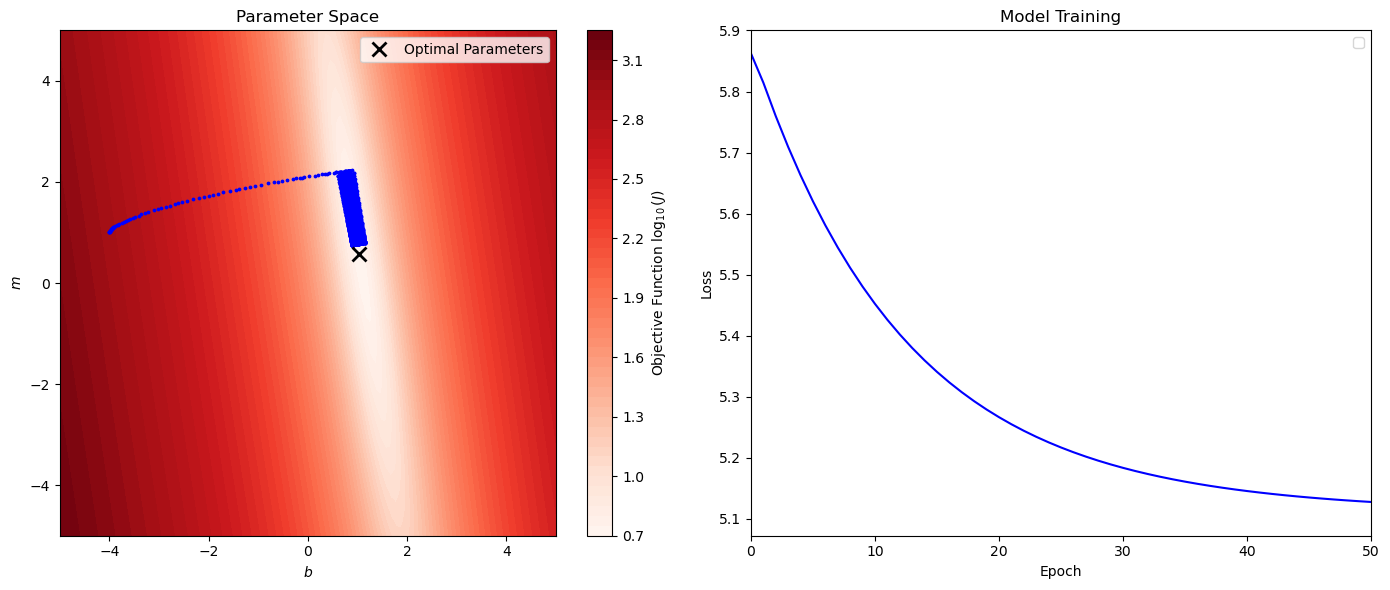

In [88]:
def SGD(data, init_m, init_b, lr, epochs, batch_size):

    # Initialising lists,
    m_params = []
    b_params = []
    loss_vals = []

    # Unpacking data,
    x, y = data[0], data[1]
    N = len(data[0])

    # Initialising model parameters,
    m, b = init_m, init_b

    for epoch in range(epochs):
    
        # Shuffle dataset,
        shuffle_indices = np.random.permutation(N)
        x_shuffle, y_shuffle = x[shuffle_indices], y[shuffle_indices]

        # Applying noisy gradient descent,
        for start_idx in range(0, N, batch_size):

            # Computing index of last sample in the batch,
            end_idx = start_idx + batch_size

            # Creating batches,
            x_batch, y_batch = x[start_idx:end_idx], y[start_idx:end_idx]
            current_batch_size = len(x_batch) # <-- Batch size may change if there is overlap.
        
            # Computing model predictions,
            y_pred = m*x_batch + b

            # Computing gradients,
            grad_m = (-2/current_batch_size)*np.sum(x_batch*(y_batch-y_pred))
            grad_b = (-2/current_batch_size)*np.sum(y_batch-y_pred)

            # Updating parameters,
            m = m - lr*grad_m
            b = b - lr*grad_b

            # Storing parameters for each epoch,
            m_params.append(m)
            b_params.append(b)

        # Storing loss for each epoch,
        y_pred = m*x + b
        loss_vals.append(np.mean((y - y_pred)**2))

    return m_params, b_params, loss_vals

"""CREATING MODEL DATA"""

# Random seed,
np.random.seed(42)

# Parameters,
m = 1
b = 1
N = 100
noise_std = 2.5

# Creating data,
x = np.linspace(0, 10, N)
noise = np.random.normal(0, noise_std, size=N)
y = m*x + b + noise
data = np.array([x, y])

"""PERFORMING GRADIENT DESCENT"""
m_params, b_params, loss_vals = SGD(data=data, init_m=-4, init_b=1, lr=0.001, epochs=100, batch_size=1)

# Computing analytical solution,
x_mean = np.mean(data[0])
y_mean = np.mean(data[1])
xy_mean = np.mean(data[0]*data[1])
x2_mean = np.mean(data[0]**2)
m_model = (x_mean*y_mean - xy_mean)/(x_mean**2 - x2_mean)
b_model = y_mean - m_model*x_mean
print(fr"Optimal parameters: m = {m_model}, b = {b_model}")

"""PLOTTING VISUALISATIONS"""

# Creating mesh grid,
m_vals = np.linspace(-5, 5, 100)
b_vals = np.linspace(-5, 5, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Computing MSE loss for each (m, b) pair,
loss = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        loss[i, j] = np.log10(np.mean((y - y_pred)**2))

# Plotting,
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Surface visualisation,
contour = axes[0].contourf(M, B, loss, levels=50, cmap="Reds")
fig.colorbar(contour, ax=axes[0], label=r"Objective Function $\log_{10}(J)$")
axes[0].scatter(m_params, b_params, color="blue", s=3)
axes[0].plot(m_model, b_model, 'x', color='black', markersize=10, markeredgewidth=2, label="Optimal Parameters")
axes[0].legend()
axes[0].set_xlabel("$b$")
axes[0].set_ylabel("$m$")
axes[0].set_title("Parameter Space")

# Training visualisation,
axes[1].plot(loss_vals, color="blue")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].set_title("Model Training")
axes[1].set_xlim(0, 50)
axes[1].legend()

plt.tight_layout()
plt.show()

# Momentum

Again, let us continue with the ball falling into a valley analogy. As the ball falls closer to the lowest point of the valley, it gains momentum due to the force of gravity. So far in our gradient descent algorithm, we do not consider the previous gradient when computing the gradient for the current epoch. However, we want to do this because we want a compounding effect if the gradients are generally in the same direction across epochs. That is, if the loss surface is such that the gradients are aligned over several iterations, we should accelerate in that direction — much like a ball picking up speed as it rolls downhill. By incorporating previous gradients, we effectively smooth out the updates, allowing for faster convergence in consistent directions and reducing erratic jumps when the gradient direction fluctuates. This approach, known as momentum in machine learning and helps the algorithm push through flat regions or shallow local minima. 

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Gradient Descent + Momentum}(\boldsymbol{\theta}_{\text{init}}, \eta, \gamma, \epsilon) \\
1. & \boldsymbol{\theta}^{(0)} \gets \boldsymbol{\theta}_{\text{init}} \\
2. & \mathbf{v}^{(0)} \gets \mathbf{0} \\
3. & t \gets 0 \\
4. & \textbf{repeat} \\
5. & \quad t \gets t + 1 \\
6. & \quad \mathbf{v}^{(t)} \gets \gamma \, \mathbf{v}^{(t-1)} + \eta \, \nabla f(\boldsymbol{\theta}^{(t-1)}) \\
7. & \quad \boldsymbol{\theta}^{(t)} \gets \boldsymbol{\theta}^{(t-1)} - \mathbf{v}^{(t)} \\
8. & \textbf{until } \left| f(\boldsymbol{\theta}^{(t)}) - f(\boldsymbol{\theta}^{(t-1)}) \right| < \epsilon \\
9. & \textbf{return } \boldsymbol{\theta}^{(t)} \\
\end{array}
$$

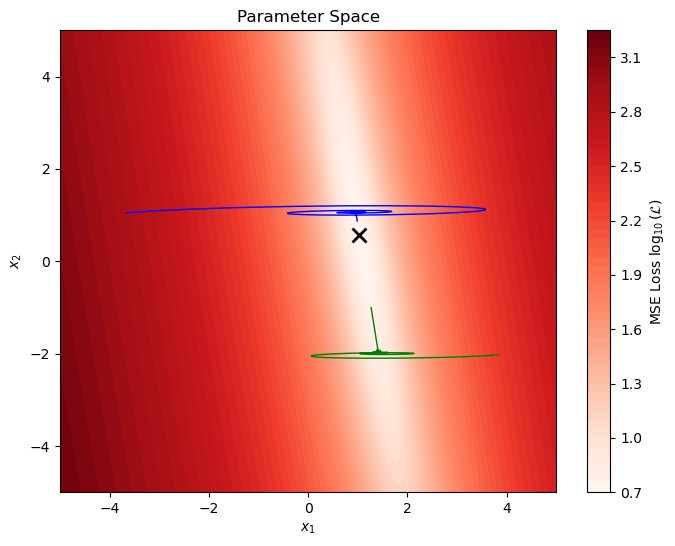

In [10]:
def grad_descent_momentum(data, init_m, init_b, lr, gamma, epochs):

    # Initialising lists,
    m_params = []
    b_params = []

    # Unpacking data,
    x, y = data[0], data[1]
    N = len(data[0])
    m, b = init_m, init_b
    v_m, v_b = 0, 0

    # Applying gradient descent,
    for i in range(epochs):
    
        # Computing model predictions,
        y_pred = m*x + b

        # Computing gradients,
        grad_m = (-2/N)*np.sum(x*(y-y_pred))
        grad_b = (-2/N)*np.sum(y-y_pred)

        # Updating parameters,
        v_m = gamma*v_m + lr*grad_m 
        m = m - v_m
        v_b = gamma*v_b + lr*grad_b 
        b = b - lr*grad_b
        m_params.append(m)
        b_params.append(b)

    return m_params, b_params

"""PERFORMING GRADIENT DESCENT"""
m1_params, b1_params = grad_descent_momentum(data=data, init_m=-4, init_b=1, lr=0.001, gamma=0.9, epochs=1000)
m2_params, b2_params = grad_descent_momentum(data=data, init_m=4, init_b=-2, lr=0.001, gamma=0.9, epochs=1000)

# Computing analytical solution,
x_mean = np.mean(data[0])
y_mean = np.mean(data[1])
xy_mean = np.mean(data[0]*data[1])
x2_mean = np.mean(data[0]**2)
m_model = (x_mean*y_mean - xy_mean)/(x_mean**2 - x2_mean)
b_model = y_mean - m_model*x_mean

"""PLOTTING PARAMETER SPACE"""

# Creating mesh grid,
m_vals = np.linspace(-5, 5, 100)
b_vals = np.linspace(-5, 5, 100)
M, B = np.meshgrid(m_vals, b_vals)

# Computing MSE loss for each (m, b) pair,
loss = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        loss[i, j] = np.log10(np.mean((y - y_pred)**2))

# Plotting,
plt.figure(figsize=(8, 6))
contour = plt.contourf(M, B, loss, levels=50, cmap="Reds")
plt.colorbar(contour, label=r"MSE Loss $\log_{10}(\mathcal{L})$")
plt.plot(m1_params, b1_params, color="blue", linewidth=1)
plt.plot(m2_params, b2_params, color="green", linewidth=1)
plt.plot(m_model, b_model, 'x', color='black', markersize=10, markeredgewidth=2, label='True parameters')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Parameter Space")
plt.show()

# Convexity

Recall that trainable machine-learning models can be considered as a mathematical function $f(\theta)$ where $\theta$ represent the parameters that must be optimised during model training. These models in combination with their objective function $J(\theta)$ can be considered either convex or non-convex depending on the shape of the loss landscape. Formally, a function $f$ can be considered to be convex if the following inequality holds within its entire domain (https://web.stanford.edu/~boyd/cvxbook/),

$$
f\left( \sum_{i=1}^n \lambda_i x_i \right) \le \sum_{i=1}^n \lambda_i f(x_i)
$$

Note that the input to the model, its features, is denoted by $X = [x_1, x_2, x_3, ..., x_j, x_N]$ and $\lambda_j$ are normalised scalars forming a convex combination such that $\Sigma_j \lambda_j = 1$. **A convex function has the key property that any local minimum is also a global minimum**. As a result, convex functions are often described as "bowl-shaped." This makes them highly favorable for gradient descent optimisation methods, as convergence to a global minimum is theoretically guaranteed (in the limit of an infinite of epochs and under mild conditions on the learning rate and function smoothness). Conversely, non-convex functions have may have many local minima (or maxima) and are less favourable for gradient descent since the algorithm is likely to converge to a local minima rather than global one. Generally speaking, models such as linear regression, logistic regression, SVMs with loss functions such as MSE, Hinge loss and cross-entropy are convex. This is in contrast to deep-learning models which are almost always non-convex due to non-linear activation functions and many layers. For completion will shall demonstrate that the objective functions for the linear regression model considered is convex,